In [340]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [374]:
import numpy as np
import pandas as pd
import re
import requests as req
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from bs4 import BeautifulSoup

In [348]:
import warnings
warnings.filterwarnings('ignore')

In [304]:
html = req.get('http://www.golfchannel.com/tours/pga-of-america/2014/pga-championship/')
soup = BeautifulSoup(html.content, "html.parser")
table = soup.findAll('table')

In [511]:
years = ['2005', '2006', '2007', '2008', '2009', '2012', '2014', '2015']

tables = []

for year in years:
    html = req.get('http://www.golfchannel.com/tours/pga-of-america/' + year + '/pga-championship/')
    soup = BeautifulSoup(html.content, "html.parser")
    table = soup.findAll('table')
    tables.append(table)

In [796]:
dictionaries = []

for table in tables:

    data = {}
    rows = table[1].findAll('tr')

    if len(soup.findAll('th')) > 0:
        rows = rows[1:]
    i=0
    
    for row in rows:

        try:
            cells = row.findAll('td')
            name = cells[3].get_text().encode().strip()

            data[name] = {
                'POS' : re.sub("\D", "", cells[1].get_text()),
                'MOV' : cells[2].get_text().strip(),
                'OVERALL' : int(cells[4].get_text()),
                'THRU' : cells[5].get_text(),
                'RND' : cells[6].get_text(),
                'R1' : cells[7].get_text(),
                'R2' : cells[8].get_text(),
                'R3' : cells[9].get_text(),
                'R4' : int(cells[10].get_text()),
                'TOT' : cells[11].get_text()
            }
            
        except BaseException as e:
            i+=1
     
    dictionaries.append(data)

In [ ]:
'''
df = pd.DataFrame()

for d in dictionaries:
    dftemp = pd.DataFrame(d).T
    df = df.append(dftemp)
'''

In [797]:

dicts = dictionaries[:6]
dftrain = pd.DataFrame()

for d in dicts:
    dftemp = pd.DataFrame(d).T
    dftrain = dftrain.append(dftemp)

dftest = pd.DataFrame(dictionaries[7]).T

In [798]:
len(dicts)

6

In [799]:

dftrain.columns = ['MOV', 'OVERALL', 'POS', 'R1', 'R2', 'R3', 'R4', 'RND', 'THRU', 'TOT']

dftrain = dftrain[dftrain.POS != 'WD']
dftrain = dftrain[dftrain.POS != 'CUT']

dftrain = dftrain.drop(dftrain.columns[[0, 1, 2, 7, 8, 9]], 1)

dftrain = dftrain.convert_objects(convert_numeric=True)


In [800]:

dftest.columns = ['MOV', 'OVERALL', 'POS', 'R1', 'R2', 'R3', 'R4', 'RND', 'THRU', 'TOT']

dftest = dftest[dftest.POS != 'WD']
dftest = dftest[dftest.POS != 'CUT']

dftest = dftest.drop(dftest.columns[[0, 1, 2, 7, 8, 9]], 1)

dftest = dftest.convert_objects(convert_numeric=True)


In [ ]:
'''
df.columns = ['MOV', 'OVERALL', 'POS', 'R1', 'R2', 'R3', 'R4', 'RND', 'THRU', 'TOT']

df = df[df.POS != 'WD']
df = df[df.POS != 'CUT']

df = df.drop(df.columns[[0, 1, 2, 7, 8, 9]], 1)

df = df.convert_objects(convert_numeric=True)
'''

In [ ]:
'''
df['start10'] = np.zeros(len(df))

for i in range(0, len(df)):
    if "*" in df.index[i]:
        (df['start10'])[i] = 1
'''

In [801]:
#dftrain, dftest = train_test_split(df, test_size = .2)

y = dftrain[[3]]
x = dftrain[[0, 1, 2]]

In [802]:
lm = LinearRegression()
lm.fit(x, y)

print lm.intercept_
print lm.coef_

[ 57.87174448]
[[ 0.10650248 -0.04103787  0.14440993]]


In [803]:
pred = lm.predict(dftest[[0, 1, 2]])

In [804]:
dftest['predR4'] = pred

In [805]:
dftest['TOT'] = dftest[[0, 1, 2, 3]].sum(axis=1)
dftest['predTOT'] = dftest[[0, 1, 2, 4]].sum(axis=1)

In [806]:
dftest.sort('predTOT')

,R1,R2,R3,R4,predR4,TOT,predTOT
"Day, Jason *",68,67,66,67,71.895431,268,272.895431
"Spieth, Jordan",71,67,65,68,72.070528,271,275.070528
"Grace, Branden",71,69,64,69,71.844043,273,275.844043
"Rose, Justin *",69,67,68,70,72.290753,274,276.290753
"Kaymer, Martin *",70,70,65,73,71.840912,278,276.840912
"Finau, Tony",71,66,69,71,72.689206,277,278.689206
"Johnson, Dustin *",66,73,68,69,71.725018,276,278.725018
"Jones, Matt",68,65,73,75,72.988376,281,278.988376
"Lahiri, Anirban",70,67,70,68,72.686075,275,279.686075
"Kuchar, Matt *",68,72,68,68,71.979061,276,279.979061


In [807]:
Correlation = dftest[['TOT', 'predTOT']].corr()
Correlation

,TOT,predTOT
TOT,1.00000,0.87832
predTOT,0.87832,1.00000


In [808]:
RSq = (dftest[['TOT', 'predTOT']].corr())**2
RSq

,TOT,predTOT
TOT,1.000000,0.771446
predTOT,0.771446,1.000000


In [809]:
mean_squared_error(dftest['TOT'], dftest['predTOT'])

10.616211212266956

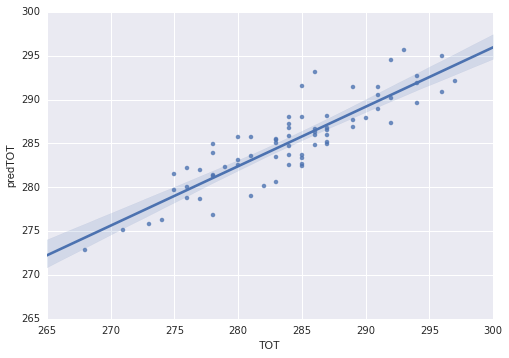

In [810]:
sns.regplot('TOT', 'predTOT', dftest)